# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

### Contact

**Any question about this sample solution please contact: Shuo Zhou (szhou20@sheffield.ac.uk)**

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [1]:
# Write the code for your answer here. You can use multiple cells to improve readability.

# import packages
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader, Dataset

In [2]:
torch.manual_seed(2019)
np.random.seed(2019)

#### a) Download data

In [3]:
# Define pipeline to transform input data to tensors and normalise
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Specify test and train datasets, download them and create DataLoader iterables
train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
                                     transform=transform)
trainloader = DataLoader(train, batch_size=4, shuffle=True, num_workers=2)

test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
                                    transform=transform)
testloader = DataLoader(test, batch_size=4, shuffle=False, num_workers=2)

# Specify the 10 classes of images within the datasets
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


#### b) Add noise

In [4]:
scale = 0.1

transform_noise = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                      transforms.Lambda(lambda x: x + (scale * torch.randn_like(x)))])

train_noise = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform_noise)
trainloader_noise = DataLoader(train_noise, batch_size=4, num_workers=2)

test_noise = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform_noise)
testloader_noise = DataLoader(test_noise, batch_size=4, num_workers=2)

#### c) Extract CatDog subset

In [5]:
from torch.utils.data import SubsetRandomSampler

# Get indices for the cat and dog labels
cat = train.classes.index('cat')
dog = train.classes.index('dog')

cat_train_idx = []
dog_train_idx = []
for i in range(len(train)):
    if train[i][1] == cat:
        cat_train_idx.append(i)
    elif train[i][1] == dog:
        dog_train_idx.append(i)
        
CatDog_train_idx = cat_train_idx + dog_train_idx
CatDog_train_sampler = SubsetRandomSampler(CatDog_train_idx)

CatDog_trainloader = DataLoader(train, batch_size=len(CatDog_train_idx), 
                                num_workers=2, sampler=CatDog_train_sampler)
CatDog_trainloader_noise = DataLoader(train_noise, batch_size=len(CatDog_train_idx), 
                                      num_workers=2, sampler=CatDog_train_sampler)

In [6]:
cat_test_idx = []
dog_test_idx = []
for i in range(len(test)):
    if test[i][1] == cat:
        cat_test_idx.append(i)
    elif test[i][1] == dog:
        dog_test_idx.append(i)

CatDog_test_idx = cat_test_idx + dog_test_idx
CatDog_test_sampler = SubsetRandomSampler(CatDog_test_idx)

CatDog_testloader = DataLoader(test, batch_size=len(CatDog_test_idx), 
                               sampler=CatDog_test_sampler, num_workers=2)
CatDog_testloader_noise = DataLoader(test_noise, batch_size=len(CatDog_test_idx), 
                                     sampler=CatDog_test_sampler, num_workers=2)

#### d) Visualise data

In [7]:
# Define function to display the images 
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
loaders = []

for idx_ in [cat_train_idx, dog_train_idx]:
    sampler_ = SubsetRandomSampler(idx_[:10])
    for dataset_ in [train, train_noise]:
        loaders.append(DataLoader(dataset_, batch_size=10, shuffle=False,
                                  num_workers=2, sampler=sampler_))

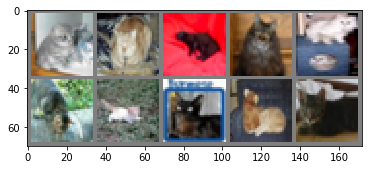

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


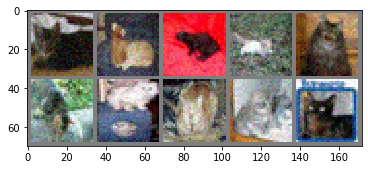

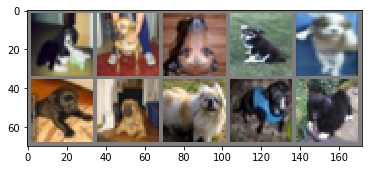

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


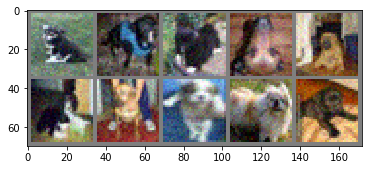

In [8]:
for loader in loaders:
    dataiter = iter(loader)
    images, labels = dataiter.next()
    imshow(torchvision.utils.make_grid(images, nrow=5))
#     print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values ($k_1, k_2, ..., k_7$) for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes Classifiers (NBC): one on the original features (raw pixels), and seven on PCA features with seven different dimensions in 2a, i.e., NBC on $k_1$ PCA features; NBC on $k_2$ PCA features; ..., NBC on $k_7$ PCA features. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


#### a) Apply PCA

In [9]:
# Write the code for your answer here. You can use multiple cells to improve readability.
from sklearn.decomposition import PCA

# CatDog_trainloader = DataLoader(train, batch_size=len(CatDog_train_idx),
#                                 sampler = CatDog_train_sampler,
#                                 shuffle=False, num_workers=0)
def loader2array(loader):
    X_train, y_train = next(iter(loader))
    X_train = X_train.numpy()
    y_train = y_train.numpy()
    n, channels, h, w = X_train.shape
    X_train = X_train.reshape(n, h*w*channels)
    
    return X_train, y_train

CatDog_X_train, CatDog_y_train = loader2array(CatDog_trainloader)

In [10]:
ks = np.logspace(2, 8, 7, base=2)  # [4, 8, 16, 32, 64, 128, 256]
ks = np.concatenate((ks, np.asarray([CatDog_X_train.shape[1]])))
var_ratio = []
pcas = []
for k in ks:
    pca = PCA(n_components=int(k), random_state=2019)
    pca.fit(CatDog_X_train)
    pcas.append(pca)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

Varying $k$ in $[1, 2, 3, 4, 5, 6, 7]$ is not appropriate. As shown in the figure below, only 60% variance of the original training data was explained when $k=8$. In practice, we usually plot this figure and choose the values above the elbow point ( 32 in this figure) for $k$.

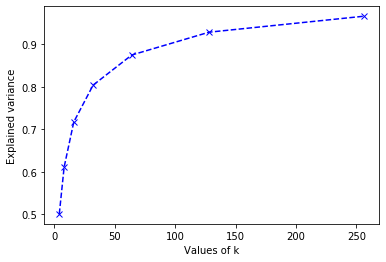

In [11]:
plt.plot(ks[:7], var_ratio[:7], 'bx--')
plt.ylabel('Explained variance')
plt.xlabel('Values of k')
plt.show()

#### b) Train Naive Bayes Classifiers (NBC)

In [12]:
from sklearn.naive_bayes import GaussianNB

nbcs = []
for pca in pcas:
    CatDog_X_train_pc = pca.transform(CatDog_X_train)
    nbc = GaussianNB()
    nbc.fit(CatDog_X_train_pc, CatDog_y_train)
    nbcs.append(nbc)

#### c) Evaluate Classifier

In [13]:
from sklearn.metrics import accuracy_score

# CatDog_testloader = DataLoader(test, batch_size=len(CatDog_test_idx), 
#                                num_workers=0, shuffle=False, 
#                                sampler=CatDog_test_sampler)
CatDog_X_test, CatDog_y_test = loader2array(CatDog_testloader)

acc_scores = []
for i, nbc in enumerate(nbcs):
    CatDog_X_test_pc = pcas[i].transform(CatDog_X_test)
    y_pred = nbc.predict(CatDog_X_test_pc)
    acc_scores.append(accuracy_score(CatDog_y_test, y_pred))

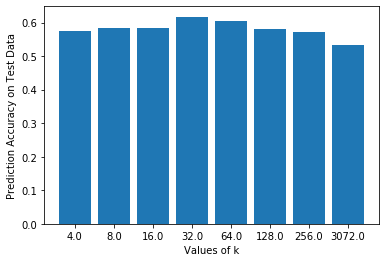

In [14]:
plt.bar(ks.astype('str'), acc_scores)
plt.xlabel('Values of k')
plt.ylabel('Prediction Accuracy on Test Data')
plt.show()

#### d) Plot ROC

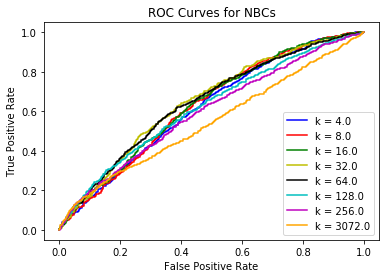

In [15]:
from sklearn.metrics import roc_curve, auc

colors = ['b', 'r', 'g', 'y', 'k', 'c', 'm', 'orange']
# Compute ROC using the probabilities of the positive class, using prediction is incorrect
aucs = []
for i, nbc in enumerate(nbcs):
    CatDog_X_test_pc = pcas[i].transform(CatDog_X_test)
    y_score = nbc.predict_proba(CatDog_X_test_pc)[:, 0]
    fpr, tpr, thresh = roc_curve(CatDog_y_test, y_score, pos_label=cat)
    aucs.append(auc(fpr, tpr))
    plt.plot(fpr, tpr, label='k = %s' % ks[i], color=colors[i])
    
plt.title('ROC Curves for NBCs')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### e) Plot AUC

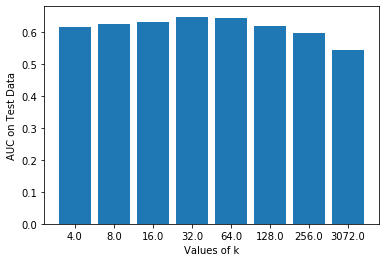

In [16]:
plt.bar(ks.astype('str'), aucs)
plt.xlabel('Values of k')
plt.ylabel('AUC on Test Data')
plt.show()

#### f) Observations

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on PCA features with three different dimensions in 3b); **four Logistic Regression** classifiers (one on the original features, and three on PCA features with three different dimensions in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

#### a) PCA and Classifier on Noisy CatDog Subset

In [17]:
# Write the code for your answer here. You can use multiple cells to improve readability.

# get train data
CatDog_noise_X_train, CatDog_noise_y_train = loader2array(CatDog_trainloader_noise)

# get test data
CatDog_noise_X_test, CatDog_noise_y_test = loader2array(CatDog_testloader_noise)

ks = np.logspace(2, 8, 7, base=2)  # [4, 8, 16, 32, 64, 128, 256]
ks = np.concatenate((ks, np.asarray([CatDog_noise_X_train.shape[1]])))
pcas = []
nbcs = []
acc_scores = []

for k in ks:
    pca = PCA(n_components=int(k), random_state=2019)
    pca.fit(CatDog_noise_X_train)
    pcas.append(pca)
    
    CatDog_noise_X_train_pc = pca.transform(CatDog_noise_X_train)
    CatDog_noise_X_test_pc = pca.transform(CatDog_noise_X_test)
    
    nbc = GaussianNB()
    nbc.fit(CatDog_noise_X_train_pc, CatDog_noise_y_train)
    nbcs.append(nbc)
    
    y_pred = nbc.predict(CatDog_noise_X_test_pc)
    acc_scores.append(accuracy_score(CatDog_noise_y_test, y_pred))

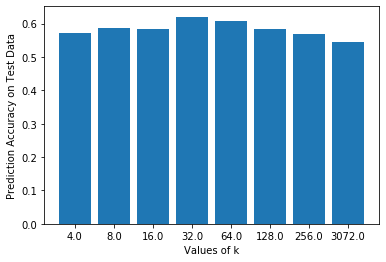

In [18]:
plt.bar(ks.astype('str'), acc_scores)
plt.xlabel('Values of k')
plt.ylabel('Prediction Accuracy on Test Data')
plt.show()

#### b) PCA on original CIFAR-10 dataset

In [51]:
trainloader = DataLoader(train, batch_size=len(train), shuffle=False, num_workers=2)
X_train, y_train = loader2array(trainloader)

testloader = DataLoader(test, batch_size=len(test), shuffle=False, num_workers=2)
X_test, y_test = loader2array(testloader)

ks = [64, 128, 256]
pcas = []
for k in ks:
    pca = PCA(n_components=k, random_state=2019)
    pca.fit(X_train)
    pcas.append(pca)
    print('%02d%% variance of original data explained with %s component' 
          % (np.sum(pca.explained_variance_ratio_)*100, k))

86% variance of original data explained with 64 component
91% variance of original data explained with 128 component
95% variance of original data explained with 256 component


#### c, d) Train and Evaluate 9 classifiers

In [52]:
import time
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.linear_model import LogisticRegression

def evaluate(clf, X_train, y_train, X_test, y_test):
    time_start = time.time()
    clf.fit(X_train, y_train)
    train_end = time.time()
    train_time = train_end - time_start
    y_pred = clf.predict(X_test)
    time_end = time.time()
    test_time = time_end - train_end
    return accuracy_score(y_test, y_pred), y_pred, train_time, test_time

In [53]:
acc_scores = []
train_times = []
test_times = []
preds = []
for clf in [GaussianNB(), LogisticRegression(solver='lbfgs', multi_class='multinomial')]:
    for pca in pcas:
        X_train_pc = pca.transform(X_train)
        X_test_pc = pca.transform(X_test)
        acc, y_pred_, train_time_, test_time_ = evaluate(clf, X_train_pc, y_train, X_test_pc, y_test)
        acc_scores.append(acc)
        preds.append(y_pred_)
        train_times.append(train_time_)
        test_times.append(test_time_)
    acc, y_pred_, train_time_, test_time_ = evaluate(clf, X_train, y_train, X_test, y_test)
    acc_scores.append(acc)
    preds.append(y_pred_)
    train_times.append(train_time_)
    test_times.append(test_time_)

/home/shuoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/shuoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/shuoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/shuoz/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [54]:
# ------------------ CNN TRAINING --------------------
class Net(nn.Module):
    # Defines the layers in the CNN
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # Cnvolutional layer
        self.pool = nn.MaxPool2d(2, 2) # Pooling layer
        self.conv2 = nn.Conv2d(6, 16, 5) # Convolutional layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84) # 3 Fully connected layers
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) 
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
loss_criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

trainloader = DataLoader(train, batch_size=4, shuffle=True, num_workers=0)

# Train the CNN, passing over the dataset twice (two epochs)
start_cnn = time.time()
for epoch in range(2):
    cumulative_loss = 0.0
    # Fetch each batch of the training data
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # Set our parameter weights to zero
        optimiser.zero_grad()
        # Perform forward pass through net
        outputs = net(inputs)
        loss = loss_criterion(outputs, labels)
        # Perform backward pass through net
        loss.backward()
        # Optimise
        optimiser.step()
        # Output training summary
        cumulative_loss += loss.item()
        if i % 2500 == 2499:
            print('[Epoch %d, Batch %5d] Loss: %.3f' %
                  (epoch + 1, i + 1, cumulative_loss / 2500))
            cumulative_loss = 0.0
end_cnn = time.time()
train_time_cnn = end_cnn - start_cnn

[Epoch 1, Batch  2500] Loss: 2.143
[Epoch 1, Batch  5000] Loss: 1.772
[Epoch 1, Batch  7500] Loss: 1.630
[Epoch 1, Batch 10000] Loss: 1.534
[Epoch 1, Batch 12500] Loss: 1.456
[Epoch 2, Batch  2500] Loss: 1.423
[Epoch 2, Batch  5000] Loss: 1.369
[Epoch 2, Batch  7500] Loss: 1.338
[Epoch 2, Batch 10000] Loss: 1.330
[Epoch 2, Batch 12500] Loss: 1.277


In [55]:
# Compute accuracy of the CNN
correct, total = 0, 0

cnn_test_start = time.time()
y_pred_cnn = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        for pred in predicted:
            y_pred_cnn.append(pred.item())
        correct += (predicted == labels).sum().item()
cnn_acc = correct / total
cnn_test_end = time.time()
test_time_cnn = cnn_test_end - cnn_test_start

In [58]:
acc_scores.append(cnn_acc)
train_times.append(train_time_cnn)
test_times.append(test_time_cnn)
preds.append(y_pred_cnn)

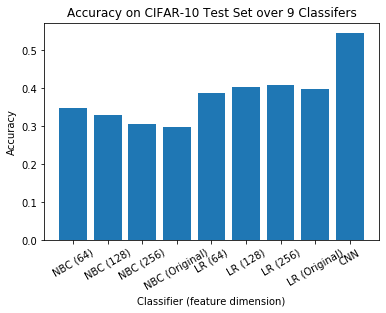

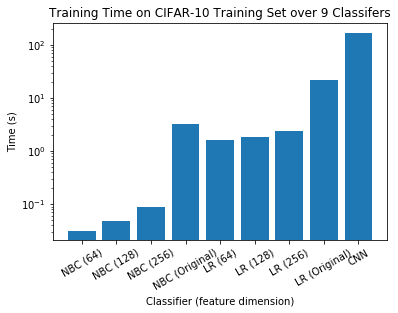

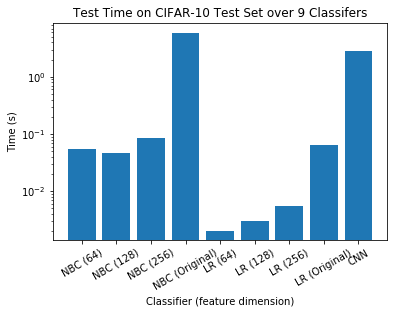

In [59]:
clf_labels = ['NBC (64)', 'NBC (128)', 'NBC (256)', 'NBC (Original)', 
              'LR (64)', 'LR (128)', 'LR (256)', 'LR (Original)', 
              'CNN']

plt.bar(clf_labels, acc_scores)
plt.xticks(rotation=30)
plt.title('Accuracy on CIFAR-10 Test Set over 9 Classifers')
plt.xlabel('Classifier (feature dimension)')
plt.ylabel('Accuracy')
plt.show()

plt.bar(clf_labels, train_times)
plt.yscale('log')
plt.xticks(rotation=30)
plt.title('Training Time on CIFAR-10 Training Set over 9 Classifers')
plt.xlabel('Classifier (feature dimension)')
plt.ylabel('Time (s)')
plt.show()

plt.bar(clf_labels, test_times)
plt.yscale('log')
plt.xticks(rotation=30)
plt.title('Test Time on CIFAR-10 Test Set over 9 Classifers')
plt.xlabel('Classifier (feature dimension)')
plt.ylabel('Time (s)')
plt.show()

#### 5) Plot Confusion Matrix

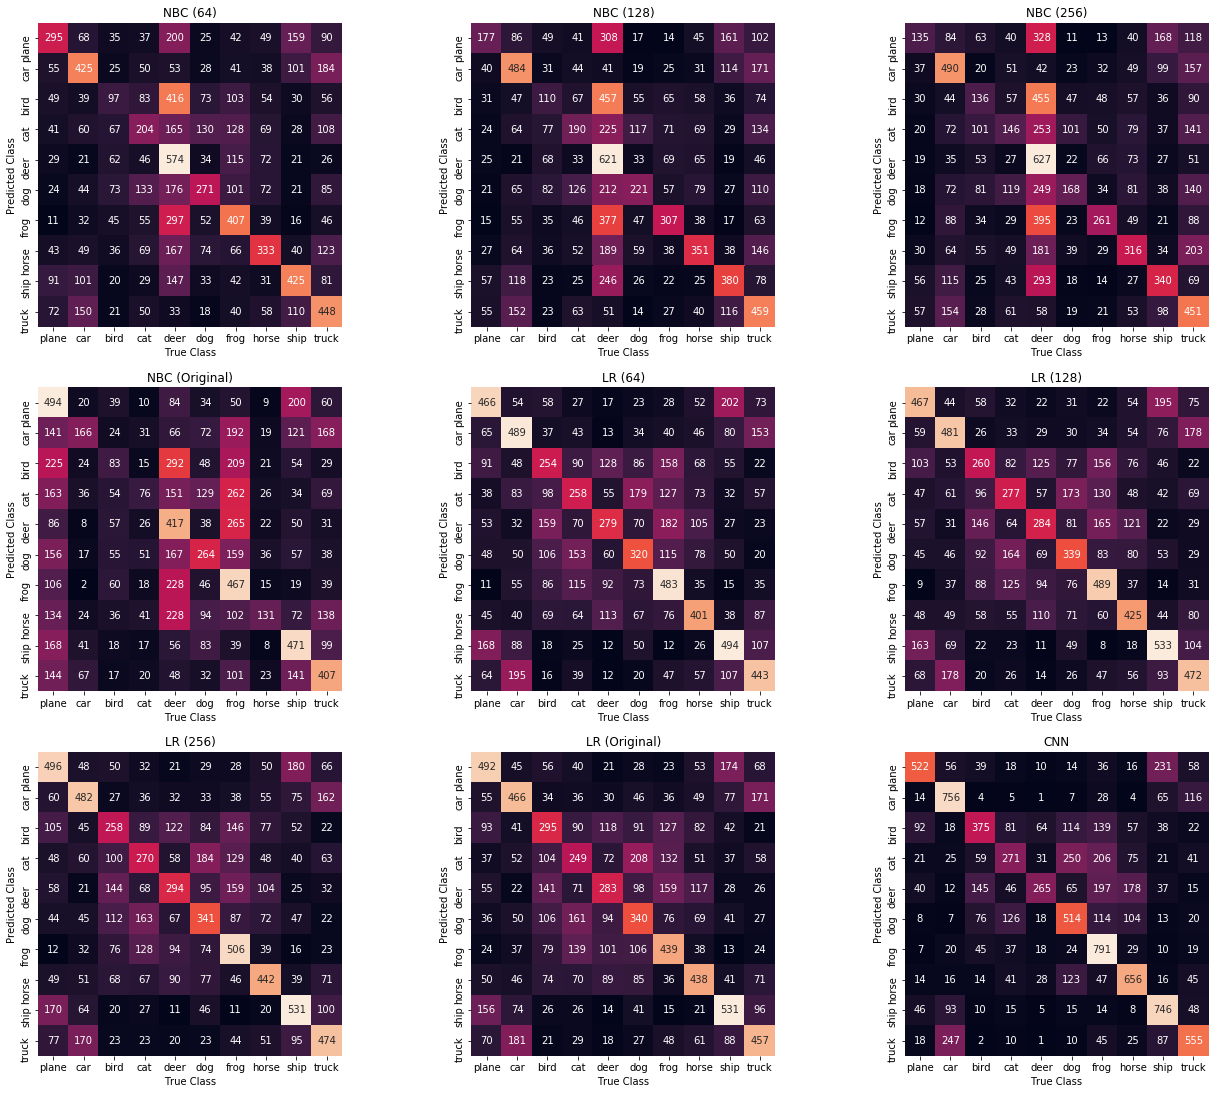

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

f = plt.figure(figsize=(22, 19))
for i, y_pred in enumerate(preds):
    mat = confusion_matrix(y_pred, y_test)
    f.add_subplot(3, 3, i+1)
    ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                     xticklabels=classes, yticklabels=classes)
    plt.xlabel('True Class')
    plt.ylabel('Predicted Class')
    plt.title(clf_labels[i])
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### f) Observations

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

#### a) Autoencoder Architecture

In [62]:
# Write the code for your answer here. You can use multiple cells to improve readability.
# define an autoencoder class
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 3 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

#### b) Train Autoencoder

In [67]:
def fit_AE(data_orig, data_noise, epochs=5, batch_size=32, lr=0.001):
    # Create instance of autoencoder model
    AE = Autoencoder()
    
    # Define MSE loss function and Adam optimiser
    loss_criterion = nn.MSELoss() 
    optimiser = torch.optim.Adam(AE.parameters(), lr=lr, weight_decay=1e-5)

    # Set up our noisy and original dataloaders
    loader_noise = DataLoader(data_noise, batch_size=batch_size, shuffle=False)
    loader_orig = DataLoader(data_orig, batch_size=batch_size, shuffle=False)
    
    loss_ = float('inf')
    for epoch in range(epochs):
        # Loop over both the original, and noisy datasets simultaneously so we 
        # can compare the reconstruction with the original in our loss function
        for i, (batch_noise, batch_orig) in enumerate(zip(loader_noise,
                                              loader_orig)):
            img_noise, label_noise_ = batch_noise
            img_orig, label_orig = batch_orig
            optimiser.zero_grad()
            reconstruction = AE(img_noise)
            loss = loss_criterion(reconstruction, img_orig)
            loss.backward()
            optimiser.step()  

        if loss > loss_:
            print('Early stopping after {} epochs'.format(epoch))
            break
        else:
            loss_ = loss
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        
    return AE
   

AE = fit_AE(train, train_noise, epochs=1)

Epoch:1, Loss:0.1033


#### c) Evaluation

In [91]:
# Evaluate the trained autoencoder on the test datasets
from sklearn.metrics import mean_squared_error

def mse(imgs_orig, imgs_reco):
    mse_list = []
    for i in range(len(imgs_orig)):
        arr_orig = imgs_orig[i].numpy().reshape(-1)
        arr_reco = imgs_reco[i].numpy().reshape(-1)
        mse_list.append(mean_squared_error(arr_orig, arr_reco))
    return(mse_list)

def evaluate_AE(testloader, testloader_noise):
    img_orig = []
    img_reco = []
    with torch.no_grad():
        for data in testloader_noise:
            img, label = data
            img_reco.append(AE(img))
        for data in testloader:
            img, label = data
            img_orig.append(img)
    mse_list = mse(img_orig, img_reco)
    return mse_list, img_orig, img_reco
        
testloader_noise = DataLoader(test_noise, batch_size=1, shuffle=False)
testloader = DataLoader(test, batch_size=1, shuffle=False)

mse_list, img_orig, img_reco = evaluate_AE(testloader, testloader_noise)

Worst 30 Reconstructed Images


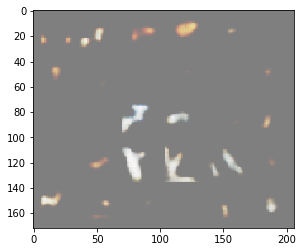

Corresponding Original Images


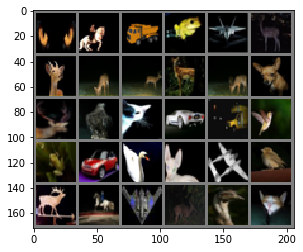

In [92]:
top30mse = sorted(mse_list, reverse=True)
top30idx = np.argsort(mse_list)[::-1][:30]

img_orig_top30 = torch.stack([img_orig[i][0] for i in top30idx])
img_reco_top30 = torch.stack([img_reco[i][0] for i in top30idx])

print('Worst 30 Reconstructed Images')
imshow(torchvision.utils.make_grid(img_reco_top30, nrow=6))

print('Corresponding Original Images')
imshow(torchvision.utils.make_grid(img_orig_top30, nrow=6))

#### d) Sensitivity Analysis

Epoch:1, Loss:0.2356
Epoch:1, Loss:0.1473
Epoch:1, Loss:0.0979
Epoch:1, Loss:0.2139


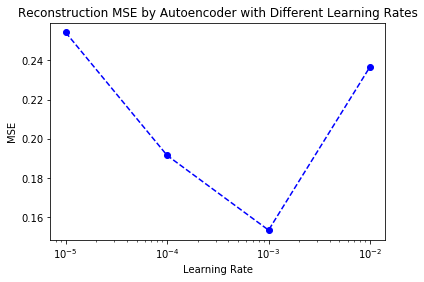

In [99]:
rates = np.logspace(-5, -2, 4)
mses = []
ae_labels = []

for lr in rates:
    AE = fit_AE(train, train_noise, epochs=1, lr=lr, batch_size=16)
    mse_list, img_orig, img_reco = evaluate_AE(testloader, testloader_noise)
    mses.append(np.mean(mse_list))
    ae_labels.append(lr)
    
plt.plot(ae_labels, mses, 'bo--')
plt.title('Reconstruction MSE by Autoencoder with Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.xscale('log')
plt.show()

Epoch:1, Loss:0.1129
Epoch:1, Loss:0.0958
Epoch:1, Loss:0.0990
Epoch:1, Loss:0.1129


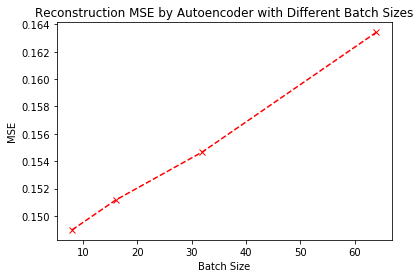

In [98]:
sizes = np.logspace(3, 6, 4, base=2)
mses = []
ae_labels = []

for bs in sizes:
    AE = fit_AE(train, train_noise, epochs=1, lr=0.001, batch_size=int(bs))
    mse_list, img_orig, img_reco = evaluate_AE(testloader, testloader_noise)
    mses.append(np.mean(mse_list))
    ae_labels.append(bs)
    
plt.plot(ae_labels, mses, 'ro--')
plt.title('Reconstruction MSE by Autoencoder with Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('MSE')
plt.show()